Think of filters as feature detectors. Each filter scans over the image and "activates" when it detects a specific type of pattern.

🧠 Analogy:

A filter is like a mini detective magnifying glass that looks for certain clues — edges, textures, corners, etc.

How It Works

A filter is a small matrix (e.g., 3×3 or 5×5) with learnable weights. During convolution:

The filter slides (or convolves) over the input image.

At each location, it performs an element-wise multiplication with the image patch.

The results are summed into a single number — that's your activation at that point.

The output is a feature map (or activation map) showing how strongly the pattern appears across the image.

In [10]:
import torch

import torch.nn.functional as F

import numpy as np

import matplotlib.pyplot as plt

from torchvision import transforms

from PIL import Image

import requests

from io import BytesIO

Take a grayscale image

Define 3 custom filters: edge detector, sharpen, and blur

Apply them using torch.nn.functional.conv2d to show how filters transform an image

Then we'll show what learned filters might look like in a trained CNN.


In [11]:
# Load and preprocess grayscale image

# Step 1: Download image from URL
url = "https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png"

response = requests.get(url)

img = Image.open(BytesIO(response.content)).convert('L')  # Grayscale


In [12]:
 # Step 2: Transform image

transform = transforms.Compose([
    
    transforms.Resize((128, 128)),

    transforms.ToTensor()

])

img_tensor = transform(img).unsqueeze(0) # [1, 1, H, W]


In [13]:
# Define filters: edge detection, sharpen, blur

edge_filter = torch.tensor([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, -1]], dtype=torch.float32)

In [14]:
sharpen_filter = torch.tensor([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]], dtype=torch.float32)

In [15]:
blur_filter = torch.tensor([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]], dtype=torch.float32)/ 9

In [16]:
filters = torch.stack([edge_filter, sharpen_filter, blur_filter]).unsqueeze(1) # [3,1,3,3]

In [17]:
# Apply filters using conv2d

with torch.no_grad():

    filtered_imgs = F.conv2d(img_tensor, filters, padding=1)

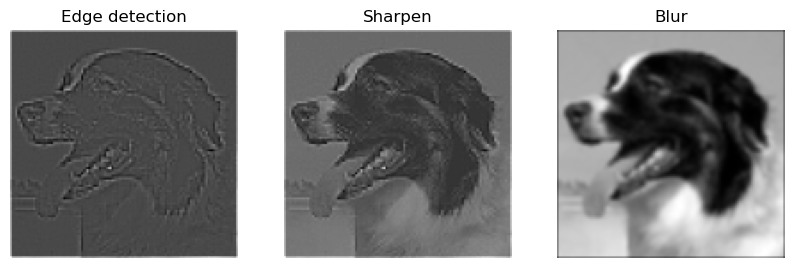

In [18]:
# Plot

titles = ['Edge detection', 'Sharpen', 'Blur']

plt.figure(figsize=(10,5))

for i in range(3):

    plt.subplot(1, 3, i+1)

    plt.imshow(filtered_imgs[0, i], cmap='gray')

    plt.title(titles[i])

    plt.axis('off')

plt.show()